In [4]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

W0824 12:39:48.369306 140395721135936 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 12:39:48.451483 140395721135936 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 12:39:48.476641 140395721135936 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

W0824 12:39:48.622616 140395721135936 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

W0824 12:39:48.920367 140395721135936 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0824 12:39:48.926497 140395721135936 deprecation_wrapper.py:119] From /home/akrantz/anaconda3/envs/deep-learning/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 122us/step - loss: 0.1569 - acc: 0.7931 - val_loss: 0.1078 - val_acc: 0.8757
Epoch 2/4
15000/15000 [==============================] - 1s 64us/step - loss: 0.0811 - acc: 0.9085 - val_loss: 0.0862 - val_acc: 0.8890
Epoch 3/4
15000/15000 [==============================] - 1s 62us/step - loss: 0.0545 - acc: 0.9371 - val_loss: 0.0838 - val_acc: 0.8877
Epoch 4/4
15000/15000 [==============================] - 1s 59us/step - loss: 0.0416 - acc: 0.9514 - val_loss: 0.0842 - val_acc: 0.8856


In [11]:
history_dict = history.history

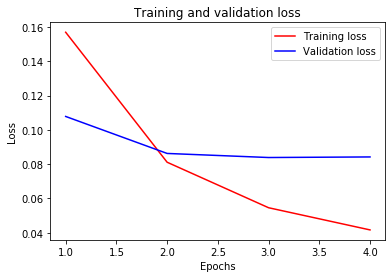

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

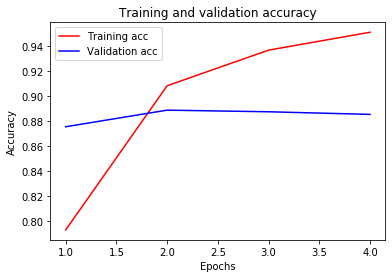

In [13]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 51us/step


[0.09145464547276497, 0.87584]

In [15]:
model.predict(x_test)

array([[0.14500955],
       [0.99481344],
       [0.8402666 ],
       ...,
       [0.11374253],
       [0.11204234],
       [0.4441129 ]], dtype=float32)